In [0]:
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.functions import *
from functools import reduce
from pyspark.sql import DataFrame
from datetime import date, timedelta
from pyspark.sql.window import *
from pyspark.sql.functions import row_number
import pandas as pd
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import os
import numpy as np

In [0]:
base_partidas = spark.read.format("csv") \
  .option("inferSchema", "false") \
  .option("header", "true") \
  .option("sep", ",") \
  .load("/FileStore/tables/teste.csv") 

base_partidas = base_partidas.fillna(0, subset=['home_goal', 'away_goal'])
base_partidas.display()
base_partidas.createOrReplaceTempView("base_partidas")


datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1
2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1,1,2012,1
2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2,1,2012,1
2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0,1,2012,1
2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0,1,2012,1
2012-05-20 16:00:00,Botafogo-RJ,RJ,Sao Paulo-SP,SP,4,2,2012,1
2012-05-20 16:00:00,Internacional-RS,RS,Coritiba-PR,PR,2,0,2012,1
2012-05-20 18:30:00,Vasco da Gama-RJ,RJ,Gremio-RS,RS,2,1,2012,1
2012-05-20 18:30:00,Bahia-BA,BA,Santos-SP,SP,0,0,2012,1
2012-05-20 18:30:00,Cruzeiro-MG,MG,Atletico-GO,GO,0,0,2012,1


In [0]:
query = f'''
WITH dados_tratados AS (
    SELECT
        season AS Temporada,
        home_team_state AS Estado,
        home_team AS Clube,
        home_goal AS Gols,
        away_goal AS Gols_tomados,
        CASE
            WHEN home_goal > away_goal THEN 3
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN home_goal > away_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN home_goal < away_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM base_partidas
    UNION ALL
    SELECT
        season AS Temporada,
        away_team_state AS Estado,
        away_team AS Clube,
        away_goal AS Gols,
        home_goal AS Gols_tomados,
        CASE
            WHEN away_goal > home_goal THEN 3
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN away_goal > home_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN away_goal < home_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM base_partidas
)
,
Tabela_class AS(
SELECT
    Temporada,
    Clube,
    Estado,
    COUNT(*) AS Partidas_jogadas,
    SUM(Vitorias) AS Vitorias,
    SUM(Empate) AS Empates,
    SUM(Derrotas) AS Derrotas,
    SUM(Gols) AS Gols,
    SUM(Gols_tomados) AS Gols_tomados,
    SUM(Gols) - SUM(Gols_tomados) AS Saldo,
    SUM(Pontos) AS Pontos
FROM dados_tratados
GROUP BY Temporada, Clube,Estado
ORDER BY Temporada,Pontos DESC, Saldo DESC, Gols DESC)

SELECT
    Temporada,
    Clube,
    Estado,
    Partidas_jogadas,
    Vitorias,
    Empates,
    Derrotas,
    Gols,
    Gols_tomados,
    Saldo,
    Pontos,
    RANK() OVER (PARTITION BY Temporada ORDER BY Pontos DESC, Saldo DESC, Gols DESC) AS Classificacao
FROM
    Tabela_class
ORDER BY
    Temporada,
    Classificacao
 
'''

classificacao = spark.sql(query)
classificacao.createOrReplaceTempView("classificacao")
display(classificacao)

Temporada,Clube,Estado,Partidas_jogadas,Vitorias,Empates,Derrotas,Gols,Gols_tomados,Saldo,Pontos,Classificacao
2012,Fluminense-RJ,RJ,38,22,11,5,61.0,33.0,28.0,77,1
2012,Atletico-MG,MG,38,20,12,6,64.0,37.0,27.0,72,2
2012,Gremio-RS,RS,38,20,11,7,56.0,33.0,23.0,71,3
2012,Sao Paulo-SP,SP,38,20,6,12,59.0,37.0,22.0,66,4
2012,Vasco da Gama-RJ,RJ,38,16,10,12,45.0,44.0,1.0,58,5
2012,Corinthians-SP,SP,38,15,12,11,51.0,39.0,12.0,57,6
2012,Botafogo-RJ,RJ,38,15,10,13,60.0,50.0,10.0,55,7
2012,Santos-SP,SP,38,13,14,11,50.0,44.0,6.0,53,8
2012,Internacional-RS,RS,38,13,13,12,44.0,40.0,4.0,52,9
2012,Cruzeiro-MG,MG,38,15,7,16,47.0,51.0,-4.0,52,10


Quais Clubes são mais consistentes nesse recorte do Brasileirão? Quais clubes participaram de todas as edições?

Pela tabela mostrada, vemos que o Atlético Mineiro se mostrou o clube mais consistente tanto na pontuação geral quanto na média de pontuação. Além disso, juntamente com poucos clubes, foi o clube que mais participou nesse recorte do Dataset.

In [0]:
%sql
SELECT Clube, SUM(Pontos) AS Pontos, ROUND(Mean(Pontos),2) AS Media, COUNT(*) AS Edicoes FROM classificacao
GROUP BY Clube
ORDER BY Pontos DESC

Clube,Pontos,Media,Edicoes
Atletico-MG,690,62.73,11
Flamengo-RJ,688,62.55,11
Corinthians-SP,651,59.18,11
Sao Paulo-SP,639,58.09,11
Santos-SP,628,57.09,11
Palmeiras-SP,622,62.2,10
Gremio-RS,613,61.3,10
Fluminense-RJ,596,54.18,11
Internacional-RS,578,57.8,10
Atletico-PR,554,55.4,10


Databricks visualization. Run in Databricks to view.

Qual é a Média Histórica de times dos Z4?

**_Os times que mais venceram fora de casa costuma ser campeões?
_**

Por essa análise observamos que SIM, nessa amostra de brasileirões, o time que tem a melhor campanha como visitante também é campeão. 100% dos campeões analisados tiveram a melhor campanha como visitantes. Isso sugere que o desempenho fora de casa é um fator crucial para a conquista do título.

In [0]:
%sql
WITH campeoes AS (
  SELECT Temporada, Clube 
  FROM classificacao
  WHERE Classificacao = 1
  GROUP BY Temporada,Clube
  ORDER BY Temporada DESC
  ),

base_away AS(   
      SELECT
        season AS Temporada,
        away_team AS Clube,
        away_goal AS Gols,
        home_goal AS Gols_tomados,
        CASE
            WHEN away_goal > home_goal THEN 3
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN away_goal > home_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN away_goal < home_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM base_partidas),

Top_visitantes AS (SELECT *,RANK() OVER (PARTITION BY Temporada ORDER BY Pontos DESC) AS Classificacao_visitante
FROM(
SELECT Temporada,Clube, SUM(Pontos) AS Pontos FROM base_away
GROUP BY Temporada,Clube
ORDER BY Temporada,Pontos DESC))

SELECT Temporada, Clube as Campeao, Classificacao_visitante FROM campeoes
LEFT JOIN Top_visitantes
USING(Temporada,Clube)



  


Temporada,Campeao,Classificacao_visitante
2012,Fluminense-RJ,1
2013,Cruzeiro-MG,1
2014,Cruzeiro-MG,1
2015,Corinthians-SP,1
2016,Palmeiras-SP,1
2017,Corinthians-SP,1
2018,Palmeiras-SP,1
2019,Flamengo-RJ,1
2020,Flamengo-RJ,1
2021,Atletico-MG,1


Os times que mais venceram dentro de casa costuma ser campeões?


Por essa análise observamos que grande parte dos times que tem a melhor campanha como mandante também são campeões. No entanto, não se mostrou uma variável tão importante como a campanha como visitante pois, cerca de 63% dos campeões nesse período tiveram a melhor campanha como mandante enquanto que no caso dos visitantes, chega nos 100%.

In [0]:
%sql
WITH campeoes AS (
  SELECT Temporada, Clube 
  FROM classificacao
  WHERE Classificacao = 1
  GROUP BY Temporada,Clube
  ORDER BY Temporada DESC
  ),

base_home AS(   
      SELECT
        season AS Temporada,
        home_team AS Clube,
        home_goal AS Gols,
        away_goal AS Gols_tomados,
        CASE
            WHEN home_goal > away_goal THEN 3
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN home_goal > away_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN home_goal < away_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM base_partidas),

Top_mandantes AS (SELECT *,RANK() OVER (PARTITION BY Temporada ORDER BY Pontos DESC) AS Classificacao_mandante
FROM(
SELECT Temporada,Clube, SUM(Pontos) AS Pontos FROM base_home
GROUP BY Temporada,Clube
ORDER BY Temporada,Pontos DESC))

SELECT Temporada, Clube as Campeao, Pontos AS Pontos_visitante, Classificacao_mandante FROM campeoes
LEFT JOIN Top_mandantes
USING(Temporada,Clube)

Temporada,Campeao,Pontos_visitante,Classificacao_mandante
2012,Fluminense-RJ,38,5
2013,Cruzeiro-MG,45,1
2014,Cruzeiro-MG,47,1
2015,Corinthians-SP,50,1
2016,Palmeiras-SP,46,3
2017,Corinthians-SP,41,1
2018,Palmeiras-SP,50,1
2019,Flamengo-RJ,53,1
2020,Flamengo-RJ,37,4
2021,Atletico-MG,52,1


Análise Estadual

Quais estados desempenham melhor no campeonato?

Vemos uma predominância maior dos estados do Sudeste nas conquistas dos Brasileirões, com destaque para o Estado de São Paulo com mais títulos e para MG com a maior média de pontos dentro dos Estados. Estados sem títulos apresentam uma maior variabilidade nas médias de classificação, com alguns estados próximos às médias dos estados campeões (como RS e PR) e outros com médias significativamente mais baixas (como AL e SC).


In [0]:
query_estados = f'''
WITH campeoes AS (
  SELECT Estado, COUNT(*) AS titulos
  FROM classificacao
  WHERE Classificacao = 1
  GROUP BY Estado
)

SELECT Estado, If(titulos IS NULL,0,titulos) AS Titulos, ROUND(MEAN(Pontos),2) As Media FROM(SELECT c.*, b.titulos
FROM classificacao c
LEFT JOIN campeoes b
USING (Estado))
GROUP BY Estado,titulos
ORDER BY titulos DESC
'''

estados = spark.sql(query_estados)
estados.createOrReplaceTempView("estados")
display(estados)


Estado,Titulos,Media
SP,5,56.91
MG,3,57.43
RJ,3,53.87
SC,0,38.61
GO,0,44.0
MT,0,42.5
RS,0,57.5
AL,0,32.0
BA,0,45.23
PE,0,42.36


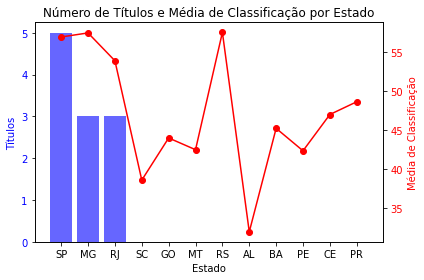

In [0]:

# Convert Spark DataFrame to Pandas DataFrame
estados_pd = estados.toPandas()

fig, ax1 = plt.subplots()

# Gráfico de barras para títulos
ax1.bar(estados_pd['Estado'], estados_pd['Titulos'], color='b', alpha=0.6, label='Títulos')
ax1.set_xlabel('Estado')
ax1.set_ylabel('Títulos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Criar segundo eixo y
ax2 = ax1.twinx()
ax2.plot(estados_pd['Estado'], estados_pd['Media'], color='r', marker='o', label='Média de Classificação')
ax2.set_ylabel('Média de Classificação', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título e legendas
plt.title('Número de Títulos e Média de Classificação por Estado')
fig.tight_layout()

# Exibir gráfico
plt.show()

Como os campeões desempenham no ano seguinte?

Vemos que apenas 20% das vezes, que foi possível avaliar o desempenho dos campeões no ano seguinte,  o campeão repetiu o feito no ano seguinte. Em média, os times campeões do Brasileirão tendem a ter uma queda no desempenho no ano seguinte, caindo cerca de 5 posições na tabela.Há exceções notáveis, como o Cruzeiro em 2014 e o Flamengo em 2020, que mantiveram uma alta classificação (1º e 2º lugares, respectivamente). Alguns campeões, como o Fluminense em 2013 (16º lugar) e o Corinthians em 2018 (13º lugar), tiveram uma queda mais acentuada no desempenho no ano seguinte.Embora alguns campeões consigam manter um alto desempenho, em média, há uma tendência de queda significativa na classificação no ano seguinte ao título

In [0]:
%sql
SELECT
    c1.Temporada AS ano_campeao,
    c1.Clube AS campeao,
    c1.Classificacao AS classificacao_campeao,
    c2.Temporada AS ano_seguinte,
    c2.Classificacao AS classificacao_seguinte
FROM
    classificacao c1
JOIN
    classificacao c2
ON
    c1.Clube = c2.Clube
AND
    c1.Temporada + 1 = c2.Temporada
WHERE
    c1.Classificacao = 1
ORDER BY
    c1.Temporada;

ano_campeao,campeao,classificacao_campeao,ano_seguinte,classificacao_seguinte
2012,Fluminense-RJ,1,2013,16
2013,Cruzeiro-MG,1,2014,1
2014,Cruzeiro-MG,1,2015,8
2015,Corinthians-SP,1,2016,7
2016,Palmeiras-SP,1,2017,2
2017,Corinthians-SP,1,2018,13
2018,Palmeiras-SP,1,2019,2
2019,Flamengo-RJ,1,2020,1
2020,Flamengo-RJ,1,2021,2
2021,Atletico-MG,1,2022,7


Desempenho no 2 turno é determinante para a conquista de título?

Muitos campeões (como o Cruzeiro em 2013, Corinthians em 2015, Palmeiras em 2016, 2018 e 2022, Flamengo em 2019 e 2021, e Atlético-MG em 2021) mantiveram uma alta posição tanto na classificação geral quanto na classificação do segundo turno.Algumas exceções incluem o Fluminense em 2012 e o Flamengo em 2020, que não terminaram o segundo turno como líderes, mas ainda assim conquistaram o título geral. A maior exceção é o Corinthians em 2017, que teve um desempenho significativamente pior no segundo turno (11º lugar) mas ainda conquistou o título.um bom desempenho no segundo turno geralmente contribui significativamente para a conquista do título, mas não é um fator absolutamente determinante. Existem exceções onde o clube não foi o melhor no segundo turno, mas ainda assim conseguiu ganhar o campeonato. 

In [0]:
%sql
WITH turno AS (
  SELECT * FROM base_partidas
  WHERE round >= 19
  ),

base_turno AS(   
    SELECT
        season AS Temporada,
        home_team_state AS Estado,
        home_team AS Clube,
        home_goal AS Gols,
        away_goal AS Gols_tomados,
        CASE
            WHEN home_goal > away_goal THEN 3
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN home_goal > away_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN home_goal < away_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM turno
    UNION ALL
    SELECT
        season AS Temporada,
        away_team_state AS Estado,
        away_team AS Clube,
        away_goal AS Gols,
        home_goal AS Gols_tomados,
        CASE
            WHEN away_goal > home_goal THEN 3
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN away_goal > home_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN away_goal < home_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM turno),


2turno AS(SELECT b.*, RANK() OVER (PARTITION BY Temporada ORDER BY Pontos_2turno DESC, Saldo_2turno DESC) AS Classificacao_2turno
 FROM
 (SELECT Temporada,Clube, SUM(Pontos) AS Pontos_2turno,SUM(Gols) - SUM(Gols_tomados) AS Saldo_2turno FROM base_turno
GROUP BY Temporada,Clube
ORDER BY Temporada,Pontos_2turno DESC) AS b )

SELECT c.Temporada,c.Clube,c.Classificacao AS Classificacao_geral,t.Classificacao_2turno  FROM classificacao c
LEFT JOIN 2turno t
USING (Temporada,Clube)
WHERE Classificacao = 1


Temporada,Clube,Classificacao_geral,Classificacao_2turno
2012,Fluminense-RJ,1,2
2013,Cruzeiro-MG,1,1
2014,Cruzeiro-MG,1,2
2015,Corinthians-SP,1,1
2016,Palmeiras-SP,1,1
2017,Corinthians-SP,1,11
2018,Palmeiras-SP,1,1
2019,Flamengo-RJ,1,1
2020,Flamengo-RJ,1,2
2021,Atletico-MG,1,1


In [0]:
%sql
WITH turno AS (
  SELECT * FROM base_partidas
  WHERE round >= 19
  ),

base_turno AS(   
    SELECT
        season AS Temporada,
        home_team_state AS Estado,
        home_team AS Clube,
        home_goal AS Gols,
        away_goal AS Gols_tomados,
        CASE
            WHEN home_goal > away_goal THEN 3
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN home_goal > away_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN home_goal = away_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN home_goal < away_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM turno
    UNION ALL
    SELECT
        season AS Temporada,
        away_team_state AS Estado,
        away_team AS Clube,
        away_goal AS Gols,
        home_goal AS Gols_tomados,
        CASE
            WHEN away_goal > home_goal THEN 3
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Pontos,
        CASE
            WHEN away_goal > home_goal THEN 1
            ELSE 0
        END AS Vitorias,
        CASE
            WHEN away_goal = home_goal THEN 1
            ELSE 0
        END AS Empate,
        CASE
            WHEN away_goal < home_goal THEN 1
            ELSE 0
        END AS Derrotas
    FROM turno),


2turno AS(SELECT b.*, RANK() OVER (PARTITION BY Temporada ORDER BY Pontos_2turno DESC, Saldo_2turno DESC) AS Classificacao_2turno
 FROM
 (SELECT Temporada,Clube, SUM(Pontos) AS Pontos_2turno,SUM(Gols) - SUM(Gols_tomados) AS Saldo_2turno FROM base_turno
GROUP BY Temporada,Clube
ORDER BY Temporada,Pontos_2turno DESC) AS b ),

Classificacao_z4 AS ( SELECT *,IF(Classificacao >= 17,"Z4",IF(Classificacao <= 4,"G4","Meio de tabela")) AS Agrupamento
          FROM Classificacao
)

SELECT c.Temporada,c.Clube,c.Agrupamento AS Agrupamento,IF(t.Classificacao_2turno>=17,"Z4","FORA_Z4") AS Agrupamento_2turno  FROM Classificacao_z4 c
LEFT JOIN 2turno t
USING (Temporada,Clube)
WHERE Agrupamento = "Z4"

Temporada,Clube,Agrupamento,Agrupamento_2turno
2012,Sport-PE,Z4,FORA_Z4
2012,Palmeiras-SP,Z4,Z4
2012,Atletico-GO,Z4,Z4
2012,Figueirense-SC,Z4,Z4
2013,Criciuma-SC,Z4,FORA_Z4
2013,Vasco da Gama-RJ,Z4,Z4
2013,Ponte Preta-SP,Z4,FORA_Z4
2013,Nautico-PE,Z4,Z4
2014,Vitoria-BA,Z4,FORA_Z4
2014,Bahia-BA,Z4,Z4
